# Titanic - Machine Learning from Disaster
![Titanic Image](https://miro.medium.com/max/1400/1*TD1TlRu96o_gDrM-NiBwpQ.jpeg)
## Kaggle competition - Luciano Guerra
[Kaggle](https://www.kaggle.com/c/titanic/data)

### Overview 

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary 

Variable | Definition | Key
- | - | -
survival | Survival | 0 = No, 1 = Yes
pclass |Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex	| |
Age	|Age in years | |	
sibsp	| # of siblings / spouses aboard the Titanic ||
parch | # of parents / children aboard the Titanic	||
ticket | Ticket number	||
fare | Passenger fare	||
cabin | Cabin number	||
embarked | Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

__pclass__: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

__age__: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp__: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

__parch__: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Start ML project
### Predefined Steps as Hands On Machine Learning _(Auréline Géron)_
1. Frame the Problem and Look at the Big Picture
2. Get the data
3. Explore the data insights
4. Prepare the data
5. Explore many different models
6. Fine-Tune your model and combine them into a great solution
7. Present your solution
8. Launch, monitor and maintain your system

## 1. Frame the Problem
This project takes part in a series of projects to improve my ML skills. This is the first project made and it should be based in a popular Kaggle competition. The target should be to obtain a good result in the Kaggle competition.

This good result should be if the accuracy in the test data is higher than 0.98.

The solution of this project should be a .csv file with the correct structure to be submited in the Kaggle form.


## 2. Get the Data

Data is provided by Kaggle to perform the competition

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/titanic.zip
./data/train.csv
./data/test.csv
./data/gender_submission.csv


## 3. Explore the data

In [3]:
train_data = pd.read_csv("./data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see there are 891 records, but Age, Cabin and Embarked are not fully completed.

In [5]:
# Check if the PassengerID could be used like index
train_data["PassengerId"].is_unique , train_data.Survived.is_unique

(True, False)

Analizamos las estadísticas del dataset

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check the ratio of survived  passengers
print("Number of passengers that survive the Titanic sinking: ", train_data.Survived.sum())
print("Ratio of survivors: ", train_data.Survived.sum() / train_data.Survived.count())

Number of passengers that survive the Titanic sinking:  342
Ratio of survivors:  0.3838383838383838


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

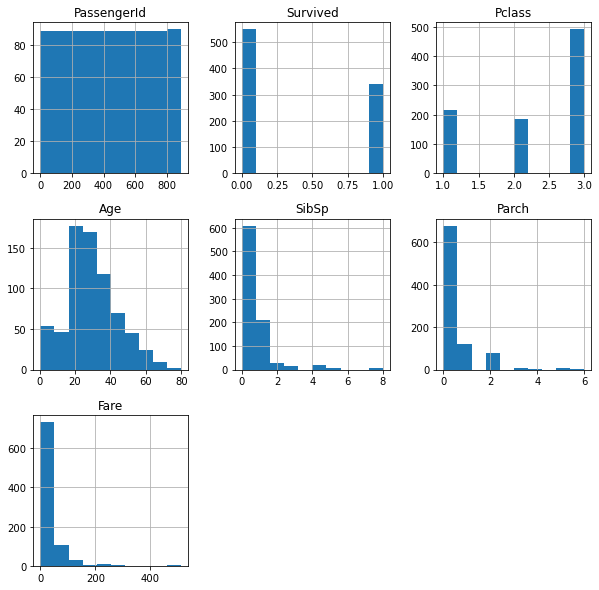

In [8]:
# First look at numerical information
train_data.hist(figsize=(10,10))

We can assume there are much more people in the ship with 3 class, whit age between 20 and 30 years old, and with no relatives o the trip.

## 4. Prepare the data

We have different features that could be useful and other that could not be interesting in a first view.
- Initial interesting features:
 - PassengerID, Survived (target), PcClass, Sex, Age, SibSp, Parch, Fare
- Initial not interesting features:
 - Name, Ticket, Cabin
 
The interesting features must be not categorical, so we have to transform them: PcClass, Sex. We have, as well, NaN in the age feature that we have to modify.

In [13]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
train_data = train_data[features]

In [14]:
train_data.head()    

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,male,22.0,1,0,7.2500,0
1,2,1,female,38.0,1,0,71.2833,1
2,3,3,female,26.0,0,0,7.9250,1
3,4,1,female,35.0,1,0,53.1000,1
4,5,3,male,35.0,0,0,8.0500,0


Pclass and Sex must be modified to numerical features

In [15]:
train_data = pd.get_dummies(train_data, columns=['Pclass', 'Sex'])    

In [16]:
train_data.head()

,PassengerId,Age,SibSp,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,22.0,1,0,7.2500,0,0,0,1,0,1
1,2,38.0,1,0,71.2833,1,1,0,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,1,1,0
3,4,35.0,1,0,53.1000,1,1,0,0,1,0
4,5,35.0,0,0,8.0500,0,0,0,1,0,1


In [17]:
train_data = train_data.rename(columns={'Sex_female' : 'female', 
                       'Pclass_1' : 'C1',
                       'Pclass_2' : 'C2',
                       'Pclass_3' : 'C3'})

In [18]:
train_data = train_data.drop(['Sex_male'], axis=1)

In [19]:
train_data.describe()

,PassengerId,Age,SibSp,Parch,Fare,Survived,C1,C2,C3,female
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208,0.383838,0.242424,0.206510,0.551066,0.352413
std,257.353842,14.526497,1.102743,0.806057,49.693429,0.486592,0.428790,0.405028,0.497665,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000
75%,668.500000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Age          714 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Survived     891 non-null    int64  
 6   C1           891 non-null    uint8  
 7   C2           891 non-null    uint8  
 8   C3           891 non-null    uint8  
 9   female       891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


Now we can do a visual analysis of data

In [21]:
train_temp = train_data[train_data['Age'].isna()]
train_temp.head()

,PassengerId,Age,SibSp,Parch,Fare,Survived,C1,C2,C3,female
5,6,NaN,0,0,8.4583,0,0,0,1,0
17,18,NaN,0,0,13.0000,1,0,1,0,0
19,20,NaN,0,0,7.2250,1,0,0,1,1
26,27,NaN,0,0,7.2250,0,0,0,1,0
28,29,NaN,0,0,7.8792,1,0,0,1,1


In [22]:
train_temp['Survived'].sum() / train_temp['Survived'].count(), train_temp['Survived'].count()

(0.2937853107344633, 177)

In [23]:
train_data.Age.mean()

29.69911764705882

In [24]:
train_data['Age'] = train_data['Age'].fillna(train_data.Age.mean())

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Age          891 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Survived     891 non-null    int64  
 6   C1           891 non-null    uint8  
 7   C2           891 non-null    uint8  
 8   C3           891 non-null    uint8  
 9   female       891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.4 KB


<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

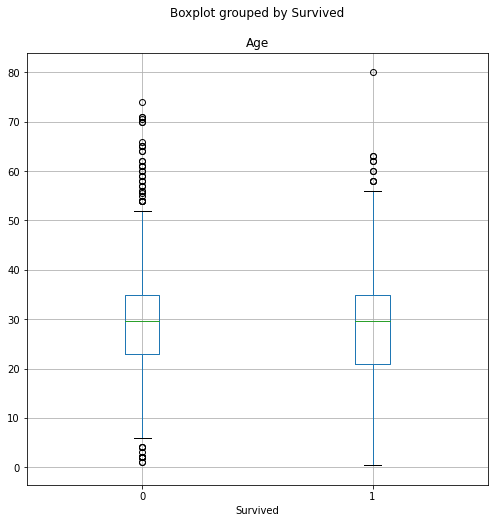

In [26]:
train_data.boxplot(column='Age', by='Survived', figsize=(8,8))

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

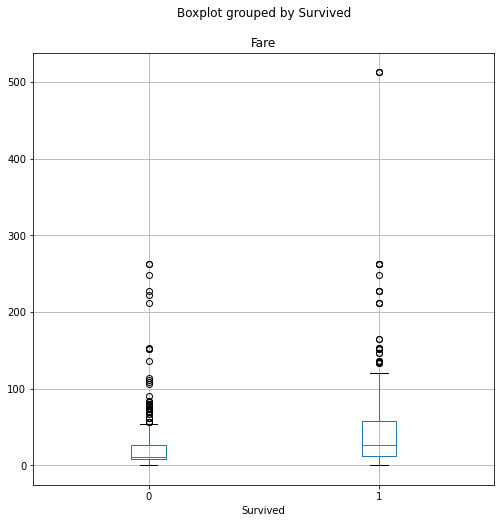

In [27]:
train_data.boxplot(column='Fare', by='Survived', figsize=(8,8))

In [28]:
surv_women = train_data[(train_data['female'] == 1) & (train_data['Survived'] == 1)].female.count()
nosurv_women = train_data[(train_data['female'] == 1) & (train_data['Survived'] == 0)].female.count()
surv_men = train_data[(train_data['female'] == 0) & (train_data['Survived'] == 1)].female.count()
nosurv_men = train_data[(train_data['female'] == 0) & (train_data['Survived'] == 0)].female.count()
print("Survived women: ", surv_women)
print("Survived men: ", surv_men)
print("Death women: ", nosurv_women)
print("Death men: ", nosurv_men)

Survived women:  233
Survived men:  109
Death women:  81
Death men:  468


In [29]:
# Ratio calculation
print("Survived women : ", surv_women / (nosurv_women + surv_women) * 100, " %.")
print("Survived men : ", surv_men / (nosurv_men + surv_men) * 100, " %.")

Survived women :  74.20382165605095  %.
Survived men :  18.890814558058924  %.


Definetly Gender was a risk factor and of course an important feature. If you were a men you had less options to survive in the Titanic sinking.

In [30]:
train_data.groupby(['Survived', 'female']).count().iloc[:,1]

Survived  female
0         0         468
          1          81
1         0         109
          1         233
Name: Age, dtype: int64

In [31]:
train_data.groupby('female').count().Survived

female
0    577
1    314
Name: Survived, dtype: int64

In [32]:
surv_c1 = train_data[(train_data['C1'] == 1) & (train_data['Survived'] == 1)].C1.count()
total_c1 = train_data['C1'].sum()
surv_c2 = train_data[(train_data['C2'] == 1) & (train_data['Survived'] == 1)].C2.count()
total_c2 = train_data['C2'].sum()
surv_c3 = train_data[(train_data['C3'] == 1) & (train_data['Survived'] == 1)].C3.count()
total_c3 = train_data['C3'].sum()
print("Survived C1: ", surv_c1 / total_c1 * 100, " %.")
print("Survived C2: ", surv_c2 / total_c2 * 100, " %.")
print("Survived C3: ", surv_c3 / total_c3 * 100, " %.")

Survived C1:  62.96296296296296  %.
Survived C2:  47.28260869565217  %.
Survived C3:  24.236252545824847  %.


Same way as gender. The lower your class was, less options to survive in the Titanic sining.

In [33]:
train_data.groupby(['Survived', 'C1', 'C2', 'C3']).count().iloc[:,1]

Survived  C1  C2  C3
0         0   0   1     372
              1   0      97
          1   0   0      80
1         0   0   1     119
              1   0      87
          1   0   0     136
Name: Age, dtype: int64

In [34]:
print(train_data[train_data['Survived'] == 1].Age.mean())
print(train_data[train_data['Survived'] == 0].Age.mean())

28.54977812177503
30.415099646415896


Age doesn't mean so relevant to decide surivival.

In [35]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
train_data['age_group'] = pd.cut(train_data.Age, range(0, 101, 10), right=False, labels=age_labels)

In [36]:
train_data.head()

,PassengerId,Age,SibSp,Parch,Fare,Survived,C1,C2,C3,female,age_group
0,1,22.0,1,0,7.2500,0,0,0,1,0,20-29
1,2,38.0,1,0,71.2833,1,1,0,0,1,30-39
2,3,26.0,0,0,7.9250,1,0,0,1,1,20-29
3,4,35.0,1,0,53.1000,1,1,0,0,1,30-39
4,5,35.0,0,0,8.0500,0,0,0,1,0,30-39


In [37]:
train_data.groupby(['age_group']).Survived.mean()

age_group
0-9      0.612903
10-19    0.401961
20-29    0.324937
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
80-89    1.000000
90-99         NaN
Name: Survived, dtype: float64

<AxesSubplot:xlabel='age_group'>

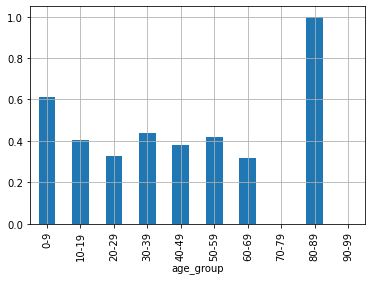

In [38]:
train_data.groupby(['age_group']).Survived.mean().plot.bar(grid=True)

<AxesSubplot:xlabel='age_group,female'>

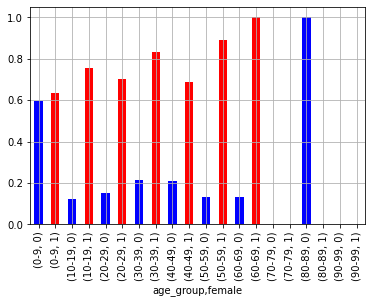

In [39]:
train_data.groupby(['age_group', 'female']).Survived.mean().plot.bar(grid=True, color= ('b', 'r'))

So, changes made to the data that must be done for the test data to submit:
- Extract interesting features.
- Get dummies for Pclass and Sex
- Rename new features created
- Drop out male redundant feature (if no female)
- Substitute NaN in Age by the mean value.
- Create age_group features

In [40]:
test_data = pd.read_csv("./data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
test_features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
test_data = test_data[test_features]
test_data = pd.get_dummies(test_data, columns=['Pclass', 'Sex'])    
test_data = test_data.rename(columns={'Sex_female' : 'female', 
                       'Pclass_1' : 'C1',
                       'Pclass_2' : 'C2',
                       'Pclass_3' : 'C3'})  
test_data = test_data.drop('Sex_male', axis=1)
test_data['Age'] = test_data['Age'].fillna(train_data.Age.mean())
test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,C1,C2,C3,female
0,892,34.5,0,0,7.8292,0,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1
2,894,62.0,0,0,9.6875,0,1,0,0
3,895,27.0,0,0,8.6625,0,0,1,0
4,896,22.0,1,1,12.2875,0,0,1,1


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         417 non-null    float64
 5   C1           418 non-null    uint8  
 6   C2           418 non-null    uint8  
 7   C3           418 non-null    uint8  
 8   female       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 18.1 KB


In [43]:
test_data['Fare'] = test_data['Fare'].fillna(train_data.Fare.mean())
test_data.describe()

,PassengerId,Age,SibSp,Parch,Fare,C1,C2,C3,female
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.154603,0.447368,0.392344,35.619000,0.255981,0.222488,0.521531,0.363636
std,120.810458,12.636666,0.896760,0.981429,55.840751,0.436934,0.416416,0.500135,0.481622
min,892.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000
75%,1204.750000,35.750000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000,1.000000
max,1309.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [44]:
train_data.describe()

,PassengerId,Age,SibSp,Parch,Fare,Survived,C1,C2,C3,female
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208,0.383838,0.242424,0.206510,0.551066,0.352413
std,257.353842,13.002015,1.102743,0.806057,49.693429,0.486592,0.428790,0.405028,0.497665,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000
75%,668.500000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
X_train = train_data.drop(['Survived', 'age_group'], axis=1)
X_test = test_data
y_train = train_data['Survived']

In [59]:
X_train.corr()

,PassengerId,Age,SibSp,Parch,Fare,C1,C2,C3,female,relatives
PassengerId,1.000000,0.033207,-0.057527,-0.001652,0.012658,0.034303,-0.000086,-0.029486,-0.042939,-0.040143
Age,0.033207,1.000000,-0.232625,-0.179191,0.091566,0.319916,0.006589,-0.281004,-0.084153,-0.248512
SibSp,-0.057527,-0.232625,1.000000,0.414838,0.159651,-0.054582,-0.055932,0.092548,0.114631,0.890712
Parch,-0.001652,-0.179191,0.414838,1.000000,0.216225,-0.017633,-0.000734,0.015790,0.245489,0.783111
Fare,0.012658,0.091566,0.159651,0.216225,1.000000,0.591711,-0.118557,-0.413333,0.182333,0.217138
C1,0.034303,0.319916,-0.054582,-0.017633,0.591711,1.000000,-0.288585,-0.626738,0.098013,-0.046114
C2,-0.000086,0.006589,-0.055932,-0.000734,-0.118557,-0.288585,1.000000,-0.565210,0.064746,-0.038594
C3,-0.029486,-0.281004,0.092548,0.015790,-0.413333,-0.626738,-0.565210,1.000000,-0.137143,0.071142
female,-0.042939,-0.084153,0.114631,0.245489,0.182333,0.098013,0.064746,-0.137143,1.000000,0.200988
relatives,-0.040143,-0.248512,0.890712,0.783111,0.217138,-0.046114,-0.038594,0.071142,0.200988,1.000000


In [60]:
X_test.corr()

,PassengerId,Age,SibSp,Parch,Fare,C1,C2,C3,female
PassengerId,1.000000,-0.030999,0.003818,0.043080,0.008278,-0.011062,0.077295,-0.054692,-0.023245
Age,-0.030999,1.000000,-0.078129,-0.044872,0.329844,0.456368,-0.056265,-0.351851,0.001406
SibSp,0.003818,-0.078129,1.000000,0.306895,0.171560,0.019166,-0.042418,0.018573,0.099943
Parch,0.043080,-0.044872,0.306895,1.000000,0.230059,-0.005485,-0.026335,0.026719,0.159120
Fare,0.008278,0.329844,0.171560,0.230059,1.000000,0.616925,-0.128683,-0.431823,0.191493
C1,-0.011062,0.456368,0.019166,-0.005485,0.616925,1.000000,-0.313770,-0.612386,0.126389
C2,0.077295,-0.056265,-0.042418,-0.026335,-0.128683,-0.313770,1.000000,-0.558487,-0.045655
C3,-0.054692,-0.351851,0.018573,0.026719,-0.431823,-0.612386,-0.558487,1.000000,-0.072405
female,-0.023245,0.001406,0.099943,0.159120,0.191493,0.126389,-0.045655,-0.072405,1.000000


In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components= 2)

In [63]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

/home/luciano/anaconda3/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- relatives

  warnings.warn(message, FutureWarning)


ValueError: X has 9 features, but PCA is expecting 10 features as input.

In [64]:
X_train_pca

array([[ 445.07441277,  -23.99553077],
       [ 443.8847687 ,   40.43002448],
       [ 443.06555271,  -23.23254319],
       ...,
       [-442.97493054,   -9.87351867],
       [-443.98653899,   -3.44722089],
       [-444.94000234,  -25.54707222]])

In [53]:
X_test_pca

array([[-4.45944194e+02, -2.54016160e+01],
       [-4.46962810e+02, -2.59082048e+01],
       [-4.47995279e+02, -2.28428275e+01],
       [-4.48933666e+02, -2.47681348e+01],
       [-4.49934118e+02, -2.12661257e+01],
       [-4.50913190e+02, -2.45434018e+01],
       [-4.51936000e+02, -2.57303427e+01],
       [-4.52983434e+02, -4.46378411e+00],
       [-4.53914764e+02, -2.64421881e+01],
       [-4.54962384e+02, -9.44816502e+00],
       [-4.55936231e+02, -2.54836146e+01],
       [-4.57009788e+02, -6.96256335e+00],
       [-4.58113660e+02,  4.86981356e+01],
       [-4.59038106e+02, -6.53561165e+00],
       [-4.60100490e+02,  2.82226528e+01],
       [-4.60976704e+02, -5.81604369e+00],
       [-4.61956504e+02, -2.09078141e+01],
       [-4.62919843e+02, -2.63946709e+01],
       [-4.63931396e+02, -2.55388181e+01],
       [-4.64960175e+02, -2.57844264e+01],
       [-4.66109506e+02,  2.66356097e+01],
       [-4.66889309e+02, -3.07610553e+01],
       [-4.67996640e+02, -1.72479177e+00],
       [-4.

In [ ]:
test_data['relatives'] = test_data.SibSp + test_data.Parch
test_data.describe()

In [ ]:
train_data.drop(['SibSp', 'Parch'], axis=1)
test_data.drop(['SibSp', 'Parch'], axis=1)

## 5. Explore many different models

The most popular classification algorithms are:
- Logistic Regression
- Naive Bayes
- K-Nearest Neighbors
- Decision Tree
- Support Vector Machines (SVM)
- Stochastic Gradient Descent (SGD)

Previous submission was done with RandomForestClassifier (Tutorial) and the Public Score was __0.77511__

In [ ]:
X_train = train_data.drop(['Survived', 'age_group'], axis=1)
X_test = test_data

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train = train_data['Survived']
y_train.head()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [ ]:
y_predict = log_reg.predict(X_test)
y_predict

In [ ]:
y_predict.sum()

In [ ]:
y_predict = pd.DataFrame(data={'PassengerId' : X_test['PassengerId'], 'Survived' : y_predict})
y_predict.head()

In [ ]:
y_predict.tail()

In [ ]:
y_predict = y_predict.set_index('PassengerId')
y_predict.head()

In [ ]:
# Prepare submission file
output = y_predict
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

The result achieved was __0.75837__. Worse value than obtained with RandomForest in the tutorial example __0.77511__.

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
y_predict = gnb.predict(X_test)
y_predict

In [ ]:
y_predict.sum()

In [ ]:
y_predict = pd.DataFrame(data={'PassengerId' : X_test['PassengerId'], 'Survived' : y_predict})
y_predict.head()

In [ ]:
y_predict = y_predict.set_index('PassengerId')
y_predict.head()

In [ ]:
# Prepare submission file
output = y_predict
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Even worse score __0.72727__. Recopilation of scores until now:
- Tutorial with RandomForest: _0.77511_
- Logistic Regression: _0.75837_.
- Gaussian Naive Bayes: __0.72727__.


### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

In [ ]:
y_predict = knc.predict(X_test)
y_predict

In [ ]:
y_predict.sum()

In [ ]:
y_predict = pd.DataFrame(data={'PassengerId' : X_test['PassengerId'], 'Survived' : y_predict})
y_predict.head()

In [ ]:
y_predict = y_predict.set_index('PassengerId')
y_predict.head()

In [ ]:
# Prepare submission file
output = y_predict
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Even worse __0.66267__.Recopilation of scores until now:

- Tutorial with RandomForest: _0.77511_.
- Logistic Regression: _0.75837_.
- Gaussian Naive Bayes: _0.72727_.
- K-Nearest Neighbour: __0.66267__


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

In [ ]:
y_predict = dtc.predict(X_test)
y_predict

In [ ]:
y_predict.sum()

In [ ]:
y_predict = pd.DataFrame(data={'PassengerId' : X_test['PassengerId'], 'Survived' : y_predict})
y_predict.head()

In [ ]:
y_predict = y_predict.set_index('PassengerId')
y_predict.head()

In [ ]:
# Prepare submission file
output = y_predict
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

A little bit better, but worse than tutorial __0.76555__.Recopilation of scores until now:

- Tutorial with RandomForest: _0.77511_.
- Logistic Regression: _0.75837_.
- Gaussian Naive Bayes: _0.72727_.
- K-Nearest Neighbour: _0.66267_.
- Decission Tree Classifier __0.76555__.


### Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

In [ ]:
y_predict = svm_clf.predict(X_test)
y_predict

In [ ]:
y_predict.sum()

In [ ]:
y_predict = pd.DataFrame(data={'PassengerId' : X_test['PassengerId'], 'Survived' : y_predict})
y_predict.head()

In [ ]:
y_predict = y_predict.set_index('PassengerId')
y_predict.head()

In [ ]:
# Prepare submission file
output = y_predict
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Worse score until now __0.63397__.Recopilation of scores until now:

- Tutorial with RandomForest: _0.77511_.
- Logistic Regression: _0.75837_.
- Gaussian Naive Bayes: _0.72727_.
- K-Nearest Neighbour: _0.66267_.
- Decission Tree Classifier _0.76555_.
- Support Vector Classifier: __0.63397__.


### Stochastic Gradient Descent (SGD)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

In [ ]:
y_predict = sgd_clf.predict(X_test)
y_predict

In [ ]:
y_predict.sum()

In [ ]:
y_predict = pd.DataFrame(data={'PassengerId' : X_test['PassengerId'], 'Survived' : y_predict})
y_predict.head()

In [ ]:
y_predict = y_predict.set_index('PassengerId')
y_predict.head()

In [ ]:
# Prepare submission file
output = y_predict
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Worse value ever __0.38755__.Recopilation of scores until now:

- Tutorial with RandomForest: _0.77511_.
- Logistic Regression: _0.75837_.
- Gaussian Naive Bayes: _0.72727_.
- K-Nearest Neighbour: _0.66267_.
- Decission Tree Classifier _0.76555_.
- Support Vector Classifier: _0.63397_.
- Stochastic Gradien Descend: __0.38755__.


#### New scenario
Results are no good and no enough to achieve our target (score up to 0.98).

So we are going to prepare a benchmark to make test in local before to submit the option.

In [55]:
# import models we want to use
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
rf_clf = RandomForestClassifier()
ab_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()
lr_clf = LogisticRegression()
sgd_clf = SGDClassifier()
svm_clf = SVC()
sgd_clf = SGDClassifier()
dt_clf = DecisionTreeClassifier()
kn_clf = KNeighborsClassifier()
gnb_clf = GaussianNB()
lda_clf = LinearDiscriminantAnalysis()
qda_clf = QuadraticDiscriminantAnalysis()

classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(n_jobs=10),
    SGDClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

First of all prepare my train data to check predictions. We are working with surpervised models, so we have to use labels to verify accuracy.

In [57]:
splits = 20
sss = StratifiedShuffleSplit(n_splits=splits, test_size=0.1, random_state=0)

X = X_train
y = y_train

acc_dict = {}

for train_index, test_index in sss.split(X,y):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_tr, y_tr)
        train_predictions = clf.predict(X_ts)
        acc = accuracy_score(y_ts, train_predictions)        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
                
        
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / splits
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')

NameError: name 'y_train' is not defined

In [ ]:
log

#### Best candidate "GradientBoostingClassifier"

### GradientBoostingClassifier

In [ ]:
X_train = train_data.drop(['Survived', 'age_group', 'SibSp','Parch'], axis=1)
X_test = test_data.drop(['SibSp', 'Parch'], axis=1)
y_train = train_data['Survived']

In [ ]:
X_test.head()

In [ ]:
bgc_clf = GradientBoostingClassifier()
bgc_clf.fit(X_train, y_train)

In [ ]:
y_predict = bgc_clf.predict(X_test)
y_predict

In [ ]:
y_predict.sum()

In [ ]:
y_predict = pd.DataFrame(data={'PassengerId' : X_test['PassengerId'], 'Survived' : y_predict})
y_predict.head()

In [ ]:
y_predict = y_predict.set_index('PassengerId')
y_predict.head()

In [ ]:
# Prepare submission file
output = y_predict
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Better value until know, out of tutorial __0.77033__.Recopilation of scores until now:

- Random Forest Classifier: _0.77511_.
- Logistic Regression: _0.75837_.
- Gaussian Naive Bayes: _0.72727_.
- K-Nearest Neighbour: _0.66267_.
- Decission Tree Classifier _0.76555_.
- Support Vector Classifier: _0.63397_.
- Stochastic Gradien Descend: _0.38755_.
- Gradient Boosting Classifier: __0.77033__

Next steps to scale data


In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
X_train_tmp = pd.DataFrame(X_train)
X_test_tmp = pd.DataFrame(X_test)

In [ ]:
X_train_tmp["Age"] = X_train_tmp["Age"] / X_train_tmp["Age"].max()
X_train_tmp["SibSp"] = X_train_tmp["SibSp"] / X_train_tmp["SibSp"].max()
X_train_tmp["Parch"] = X_train_tmp["Parch"] / X_train_tmp["Parch"].max()
X_train_tmp["Fare"] = X_train_tmp["Fare"] / X_train_tmp["Fare"].max()

In [ ]:
X_train_tmp.head()

In [ ]:
X_test_tmp["Age"] = X_test_tmp["Age"] / X_test_tmp["Age"].max()
X_test_tmp["SibSp"] = X_test_tmp["SibSp"] / X_test_tmp["SibSp"].max()
X_test_tmp["Parch"] = X_test_tmp["Parch"] / X_test_tmp["Parch"].max()
X_test_tmp["Fare"] = X_test_tmp["Fare"] / X_test_tmp["Fare"].max()

In [ ]:
X_test_tmp.head()

In [ ]:
X_train = pd.DataFrame(X_train_tmp)
X_test = pd.DataFrame(X_test_tmp)

In [ ]:
type(X_train), type(X_test)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
X_train , y_train

Now check same models as before with features standarized.

In [ ]:
splits = 20
sss = StratifiedShuffleSplit(n_splits=splits, test_size=0.1, random_state=0)

X = X_train
y = y_train

acc_dict = {}

for train_index, test_index in sss.split(X,y):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_tr, y_tr)
        train_predictions = clf.predict(X_ts)
        acc = accuracy_score(y_ts, train_predictions)        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
                
log = pd.DataFrame(columns=log_cols)

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / splits
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')

In [ ]:
log

Best candidate "RandomForestClassifier"

### Random Forest Classifier Scaled

In [ ]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)

In [ ]:
y_predict = rfc_clf.predict(X_test)
y_predict

In [ ]:
y_predict.sum()

In [ ]:
y_predict = pd.DataFrame(data={'PassengerId' : X_test['PassengerId'], 'Survived' : y_predict})
y_predict.head()

In [ ]:
y_predict = y_predict.set_index('PassengerId')
y_predict.head()

In [ ]:
# Prepare submission file
output = y_predict
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Better value until know, out of tutorial __0.75837__.Recopilation of scores until now:

- Random Forest Classifier: _0.77511_.
- Logistic Regression: _0.75837_.
- Gaussian Naive Bayes: _0.72727_.
- K-Nearest Neighbour: _0.66267_.
- Decission Tree Classifier _0.76555_.
- Support Vector Classifier: _0.63397_.
- Stochastic Gradien Descend: _0.38755_.
- Gradient Boosting Classifier: _0.76076_
- Random Forest Classifier Scaled: __0.75837__

In [ ]:
X_train

In [ ]:
X_train = train_data.drop(['Survived', 'age_group'], axis=1)
X_test = test_data
y_train = train_data['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

In [ ]:
col_names = ['Age']
X_train_feat = X_train[col_names]
X_test_feat = X_test[col_names]

In [ ]:
X_train.describe()

In [ ]:
X_test.describe()

In [ ]:
test_data.describe()

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

survived = train_data['Survived']
train_data.drop('Survived', axis=1, inplace=True)

model = DecisionTreeClassifier()
model.fit(train_data, survived)
predictions = model.predict(test_data)

print(predictions)